In [92]:
import pandas as pd
%matplotlib inline
from collections import Counter

In [3]:
trending = pd.DataFrame.from_csv('USvideos.csv')
trending.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### Correlaties

In [76]:
trending.corr()[(trending.corr() > 0.5) | (trending.corr() < -0.5)]

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,like_view_ratio,dislike_view_ratio
category_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,NaN,1.000000,0.801844,0.524888,0.579753,NaN,NaN,NaN,NaN,NaN
likes,NaN,0.801844,1.000000,NaN,0.721627,NaN,NaN,NaN,NaN,NaN
dislikes,NaN,0.524888,NaN,1.000000,0.824850,NaN,NaN,NaN,NaN,NaN
comment_count,NaN,0.579753,0.721627,0.824850,1.000000,NaN,NaN,NaN,NaN,NaN
comments_disabled,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ratings_disabled,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
video_error_or_removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
like_view_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
dislike_view_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Hoe staan likes in verband met views? Waarom krijgen bepaalde trending videos percentueel gezien meer likes?

In [58]:
# Voeg ratios toe
trending['like_view_ratio'] = trending.likes / trending.views
trending['dislike_view_ratio'] = trending.dislikes / trending.views

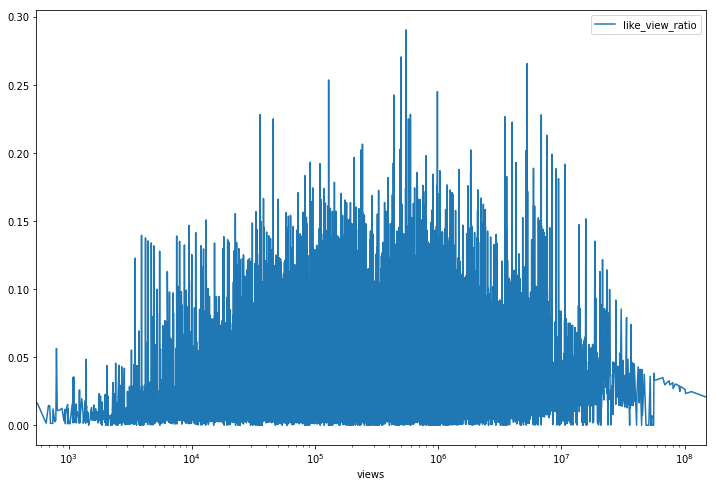

In [67]:
# Ratio likes ten opzichte van views.
trending.sort_values(by='views').plot(x='views', y="like_view_ratio", figsize=(12,8), logx=True)

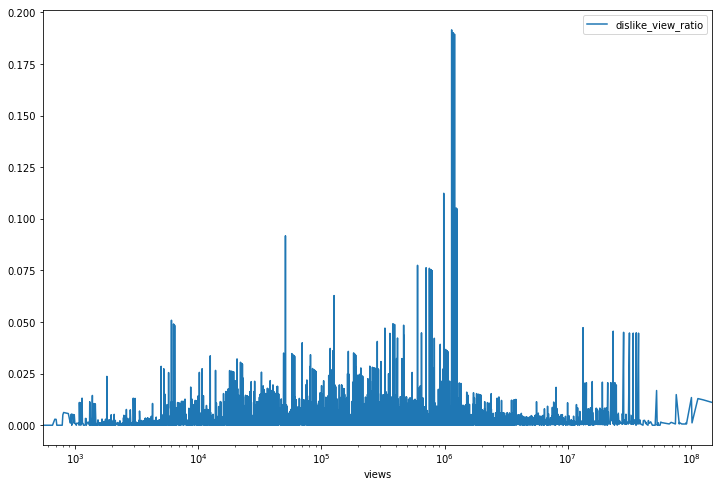

In [63]:
# Ratio dislikes ten opzichte van views.
trending.sort_values(by='views').plot(x='views', y="dislike_view_ratio", figsize=(12,8), logx=True)

In [50]:
# Welke categorieën zijn sterk vertegenwoordigd bij de hoge ratio?
trending[trending.like_view_ratio > 0.15].category_id.value_counts()

# Het lijkt erop dat muziekvideo gevolgd door ... de meeste likes krijgen.

10    78
22    23
24     9
23     7
26     6
17     3
1      3
27     1
Name: category_id, dtype: int64

### Meest controversiele videos in trending? Hebben deze dan ook meer comments dan niet controversiele videos? Wat zijn de onderwerpen van deze videos?

In [85]:
trending["like_dislike_ratio"] = trending.likes / trending.dislikes
trending[trending.like_dislike_ratio < 1].sort_values(by="like_dislike_ratio", ascending=True)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_view_ratio,dislike_view_ratio,like_dislike_ratio
video_id,,,,,,,,,,,,,,,,,,
A_mlvG_nRsg,17.22.11,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,17,2017-10-28T11:15:14.000Z,[none],2447,0,3,1,https://i.ytimg.com/vi/A_mlvG_nRsg/default.jpg,False,False,False,I'm BACK! \n\n• Will you be apart of the take ...,0.000000,0.001226,0.000000
A_mlvG_nRsg,17.21.11,Kelly Oubre Punches John Wall in the Lead duri...,Rob Andretti,17,2017-10-28T11:15:14.000Z,[none],2197,0,2,0,https://i.ytimg.com/vi/A_mlvG_nRsg/default.jpg,False,False,False,I'm BACK! \n\n• Will you be apart of the take ...,0.000000,0.000910,0.000000
LFhT6H6pRWg,17.19.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1142585,9100,218841,28013,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,0.007964,0.191531,0.041583
LFhT6H6pRWg,17.20.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1179072,9368,224152,29063,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,0.007945,0.190109,0.041793
LFhT6H6pRWg,17.21.12,PSA from Chairman of the FCC Ajit Pai,Daily Caller,22,2017-12-13T22:52:57.000Z,"thedc|""dc""|""washington dc""|""washington""|""the d...",1205682,9572,228426,29634,https://i.ytimg.com/vi/LFhT6H6pRWg/default.jpg,False,False,False,Ajit Pai has been at the heart of the net neut...,0.007939,0.189458,0.041904
8d_202l55LU,17.15.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",985179,4870,110707,19843,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,0.004943,0.112372,0.043990
8d_202l55LU,17.18.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1263104,5930,132439,23543,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,0.004695,0.104852,0.044775
8d_202l55LU,17.17.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1242998,5884,130836,23297,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,0.004734,0.105258,0.044972
8d_202l55LU,17.16.12,The FCC repeals its net neutrality rules,Washington Post,25,2017-12-14T18:49:06.000Z,"fcc net neutrality|""breaking news video""|""vide...",1192501,5707,126649,23426,https://i.ytimg.com/vi/8d_202l55LU/default.jpg,False,False,False,Federal regulators vote to allow Internet prov...,0.004786,0.106205,0.045062


In [93]:
contro = trending[trending.like_dislike_ratio < 1].title.values
for x in contro:
    for y in x.split():
        y.lower()

Counter([y.lower() for x in contro for y in x.split()])

Counter({'#1': 10,
         '#3': 1,
         '#littleones': 1,
         '#metoo': 16,
         '&': 17,
         "'fake'": 2,
         "'i": 7,
         "'monkey'": 3,
         "'n": 2,
         "'sh*thole": 1,
         "'transparent'": 5,
         '(c-span)': 14,
         '(d-ca)': 7,
         '(exclusive)': 9,
         '(full)': 6,
         '(official': 4,
         '*emotional*': 3,
         '-': 15,
         '/': 7,
         '02,': 1,
         '1': 7,
         '1-22-18': 5,
         '1/25/18': 5,
         '10': 5,
         '11,': 1,
         '11:': 6,
         '13,': 2,
         '17,': 7,
         '2017': 9,
         '2018': 45,
         '2018:': 10,
         '2020': 6,
         '23,': 2,
         '3,': 3,
         '33': 4,
         '5': 9,
         '7th': 7,
         'a': 27,
         'about': 20,
         'access': 6,
         'account': 2,
         'accused': 7,
         'accusers': 2,
         'accuses': 6,
         'act': 7,
         'ad': 1,
         'addresses': 13,
        

### Overige ideeën
- Zijn er dagen met uitzonderlijk veel dislikes
- Welke videos zijn in deze periode het meest controversieel (dislikes en likes dicht bij elkaar)
- Is er een publicatietijd die vaak voorkomt (verband tussen publicatietijd en views)
- Zijn vrolijke dagen terug te vinden in het aantal likes? Misschien volksfeesten?
- Welke categorieen hebben de hoogste aantal likes?